In [1]:
pip install pandas_datareader

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install yfinance

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader.data import DataReader
from pandas_datareader import data as pdr
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from datetime import datetime
import yfinance as yf
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline
import yfinance as yf
yf.pdr_override()
from datetime import datetime

In [4]:
tech_list = ['AAPL', 'GOOG', 'AMZN', "TSLA"]
tech_list = ['AAPL', 'GOOG', 'AMZN', "TSLA"]
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)
for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
company_list = [AAPL, GOOG, AMZN, TSLA]
company_name = ["APPLE", "GOOGLE", "AMAZON" , "TESLA"]
for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name   
df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-08-21,221.550003,232.130005,220.580002,231.279999,231.279999,135702700,TESLA
2023-08-22,240.250000,240.820007,229.550003,233.190002,233.190002,130597900,TESLA
2023-08-23,229.339996,238.979996,229.289993,236.860001,236.860001,101077600,TESLA
2023-08-24,238.660004,238.919998,228.179993,230.039993,230.039993,99777400,TESLA
2023-08-25,231.309998,239.000000,230.350006,238.589996,238.589996,106612200,TESLA
2023-08-28,242.580002,244.380005,235.350006,238.820007,238.820007,107673700,TESLA
2023-08-29,238.580002,257.480011,237.770004,257.179993,257.179993,134047600,TESLA
2023-08-30,254.199997,260.510010,250.589996,256.899994,256.899994,121988400,TESLA
2023-08-31,255.979996,261.179993,255.050003,258.079987,258.079987,108861700,TESLA


In [5]:
GOOG.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,106.904745,108.407614,105.736566,107.075279,107.075279,2.713871e+07
std,13.937112,14.014528,13.954034,13.972005,13.972005,1.104320e+07
min,85.510002,86.550003,83.449997,83.489998,83.489998,8.567800e+06
25%,95.759998,97.349998,94.470001,95.840000,95.840000,2.072920e+07
50%,102.879997,104.220001,101.860001,103.629997,103.629997,2.424990e+07
75%,120.880001,122.500000,119.652500,121.025002,121.025002,3.020725e+07
max,138.429993,138.580002,136.820007,137.350006,137.350006,9.779860e+07


In [6]:
GOOG.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-09-02 to 2023-09-01
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          251 non-null    float64
 1   High          251 non-null    float64
 2   Low           251 non-null    float64
 3   Close         251 non-null    float64
 4   Adj Close     251 non-null    float64
 5   Volume        251 non-null    int64  
 6   company_name  251 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.7+ KB


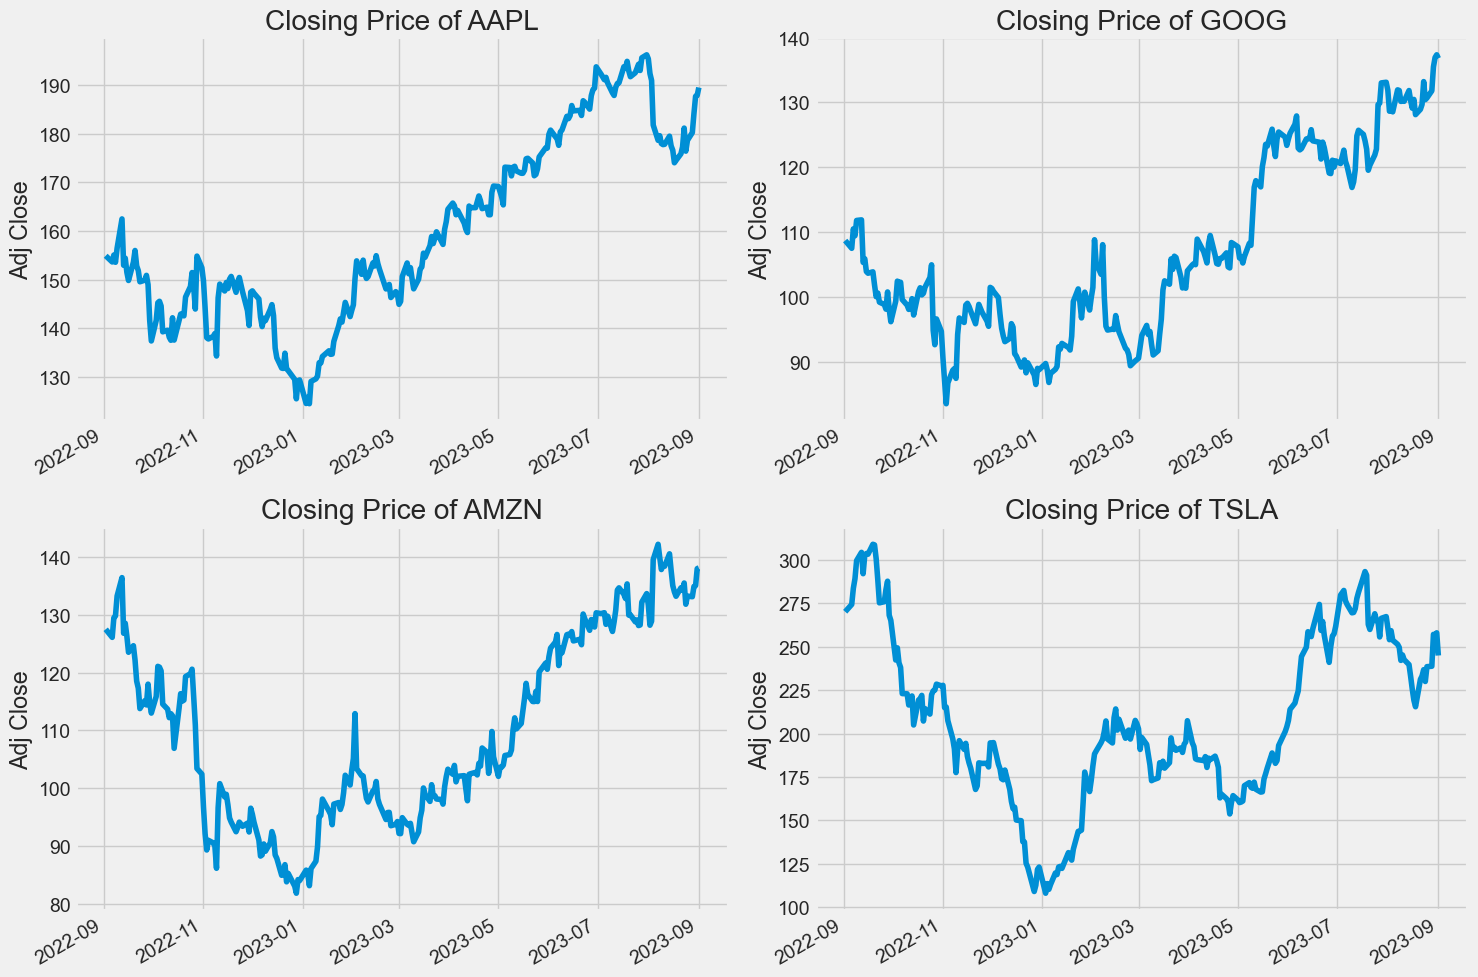

In [7]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)
for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
plt.tight_layout()

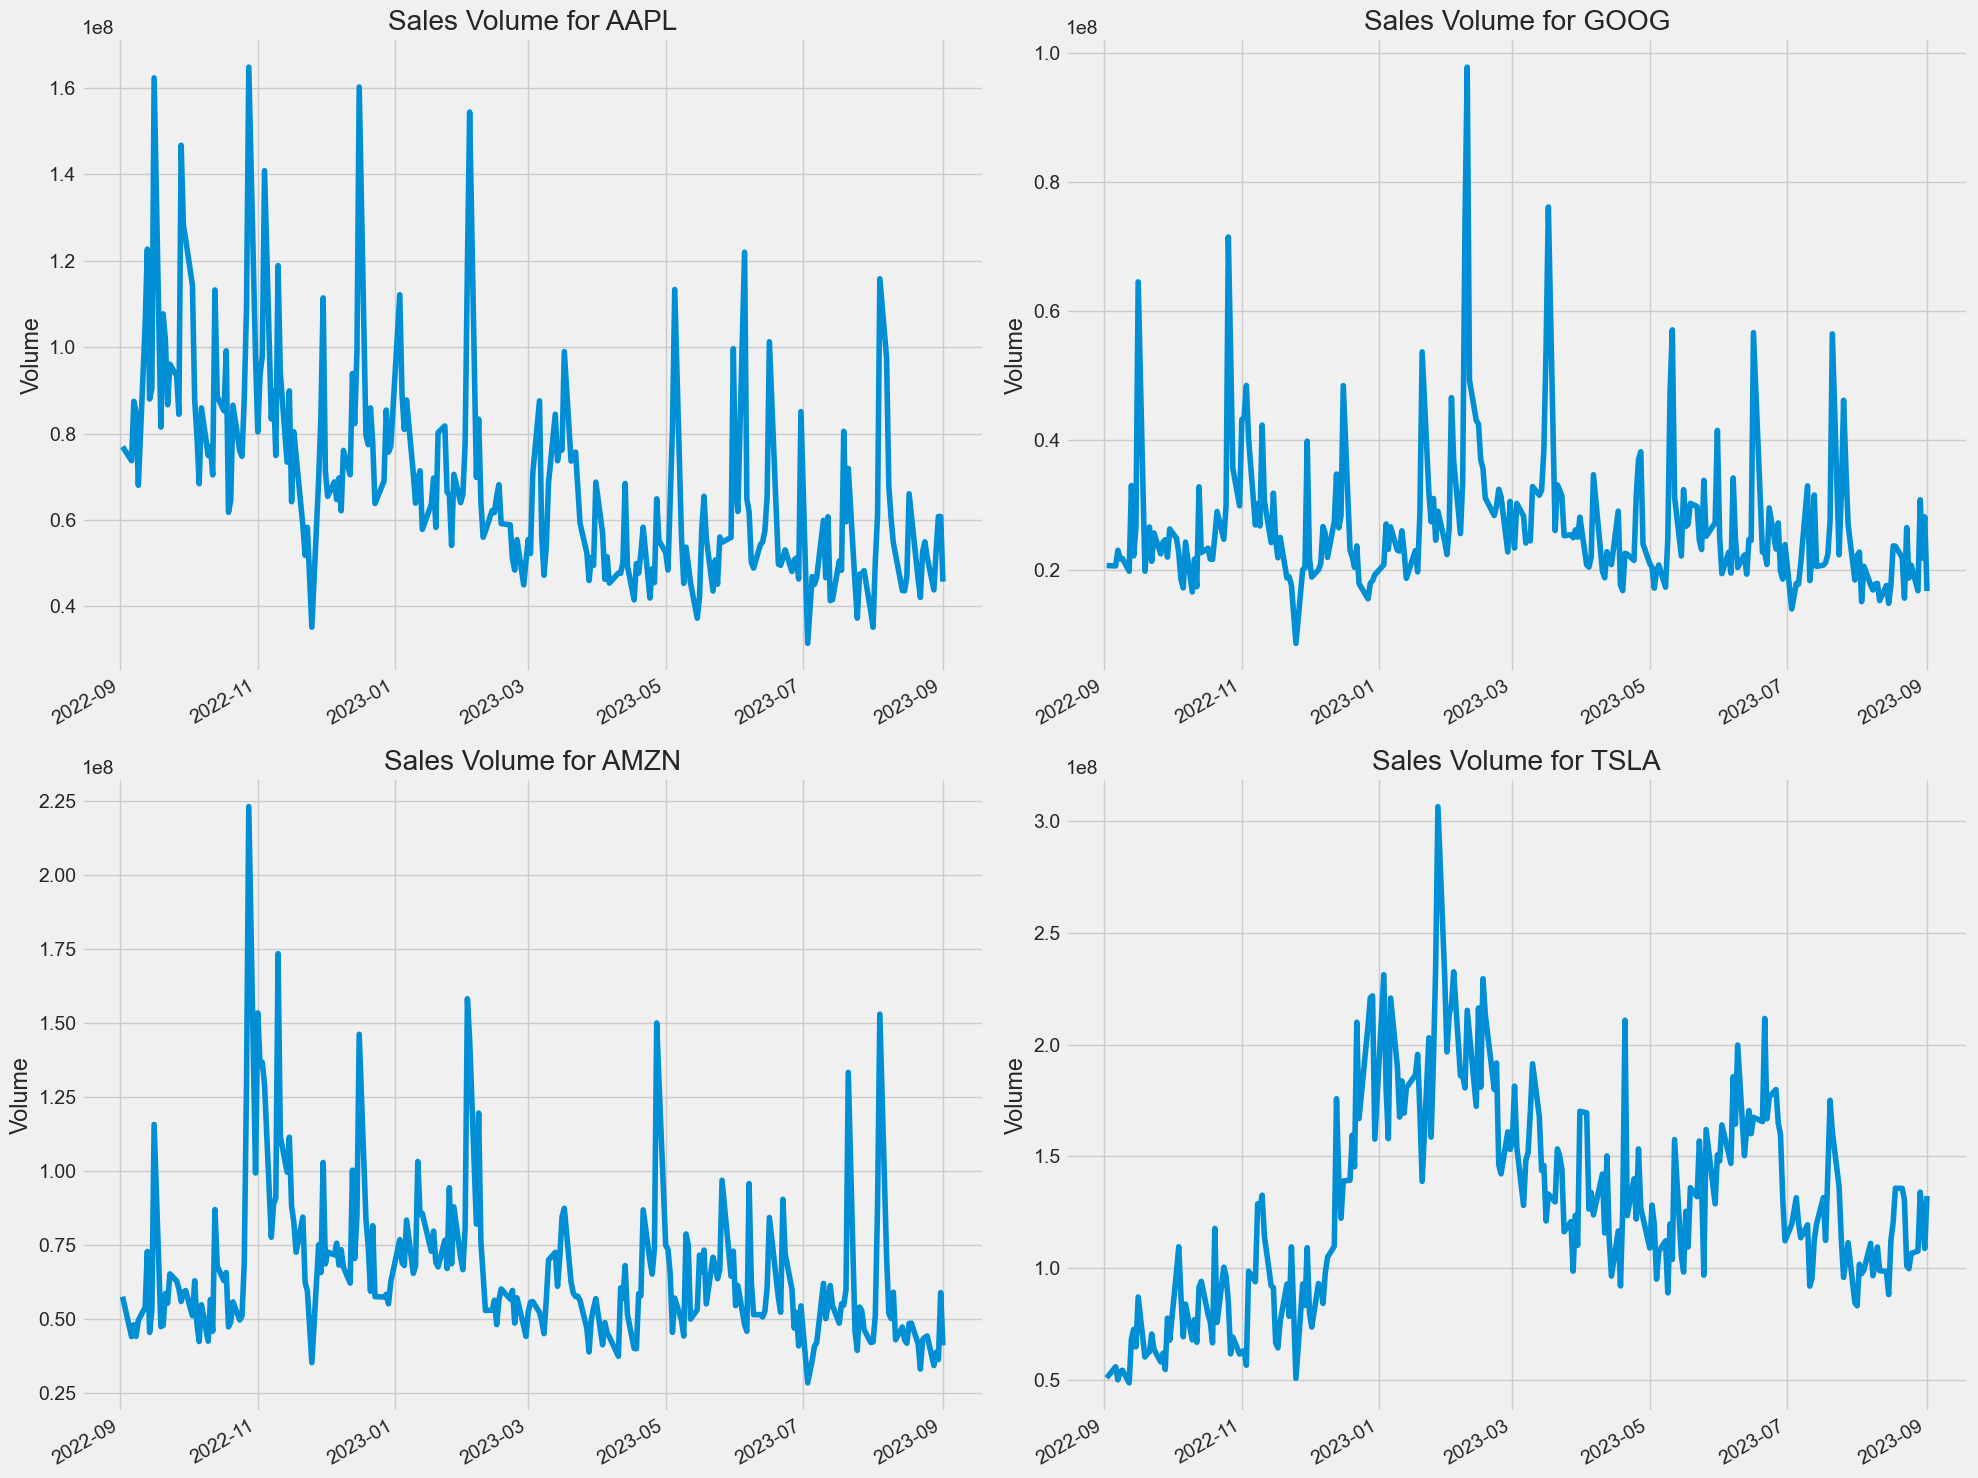

In [8]:
plt.figure(figsize=(20, 15))
plt.subplots_adjust(top=1.25, bottom=1.2)
for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")  
plt.tight_layout()

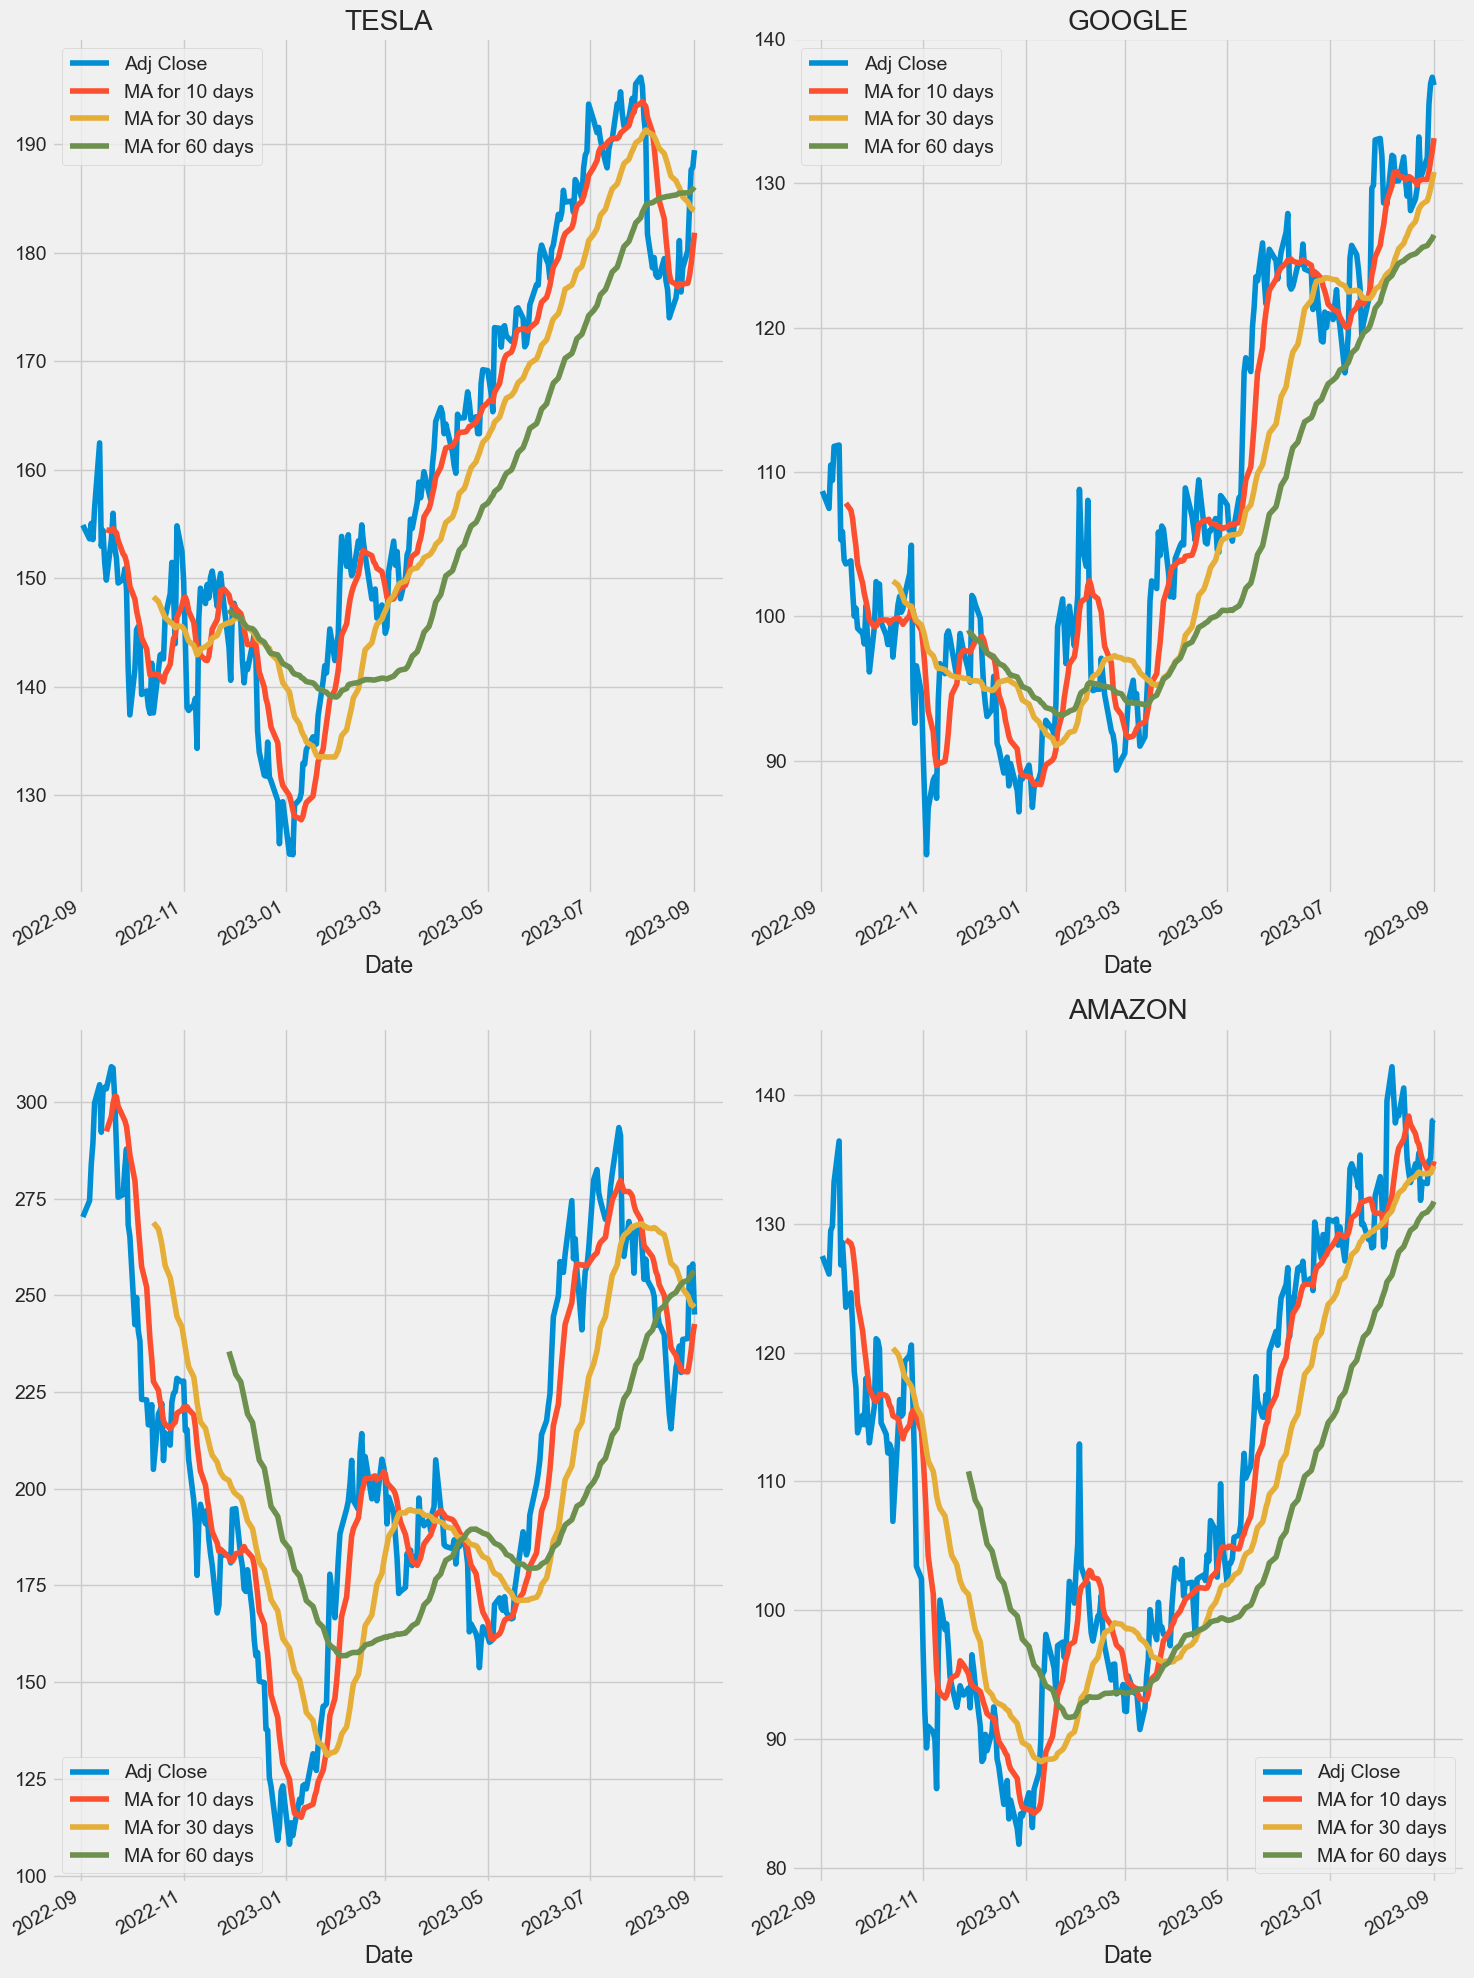

In [9]:
ma_day = [10, 30, 60]
for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()   
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(20)
fig.set_figwidth(15)
AAPL[['Adj Close', 'MA for 10 days', 'MA for 30 days', 'MA for 60 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')
GOOG[['Adj Close', 'MA for 10 days', 'MA for 30 days', 'MA for 60 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')
AMZN[['Adj Close', 'MA for 10 days', 'MA for 30 days', 'MA for 60 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')
TSLA[['Adj Close', 'MA for 10 days', 'MA for 30 days', 'MA for 60 days']].plot(ax=axes[1,0])
axes[0,0].set_title('TESLA')
fig.tight_layout()

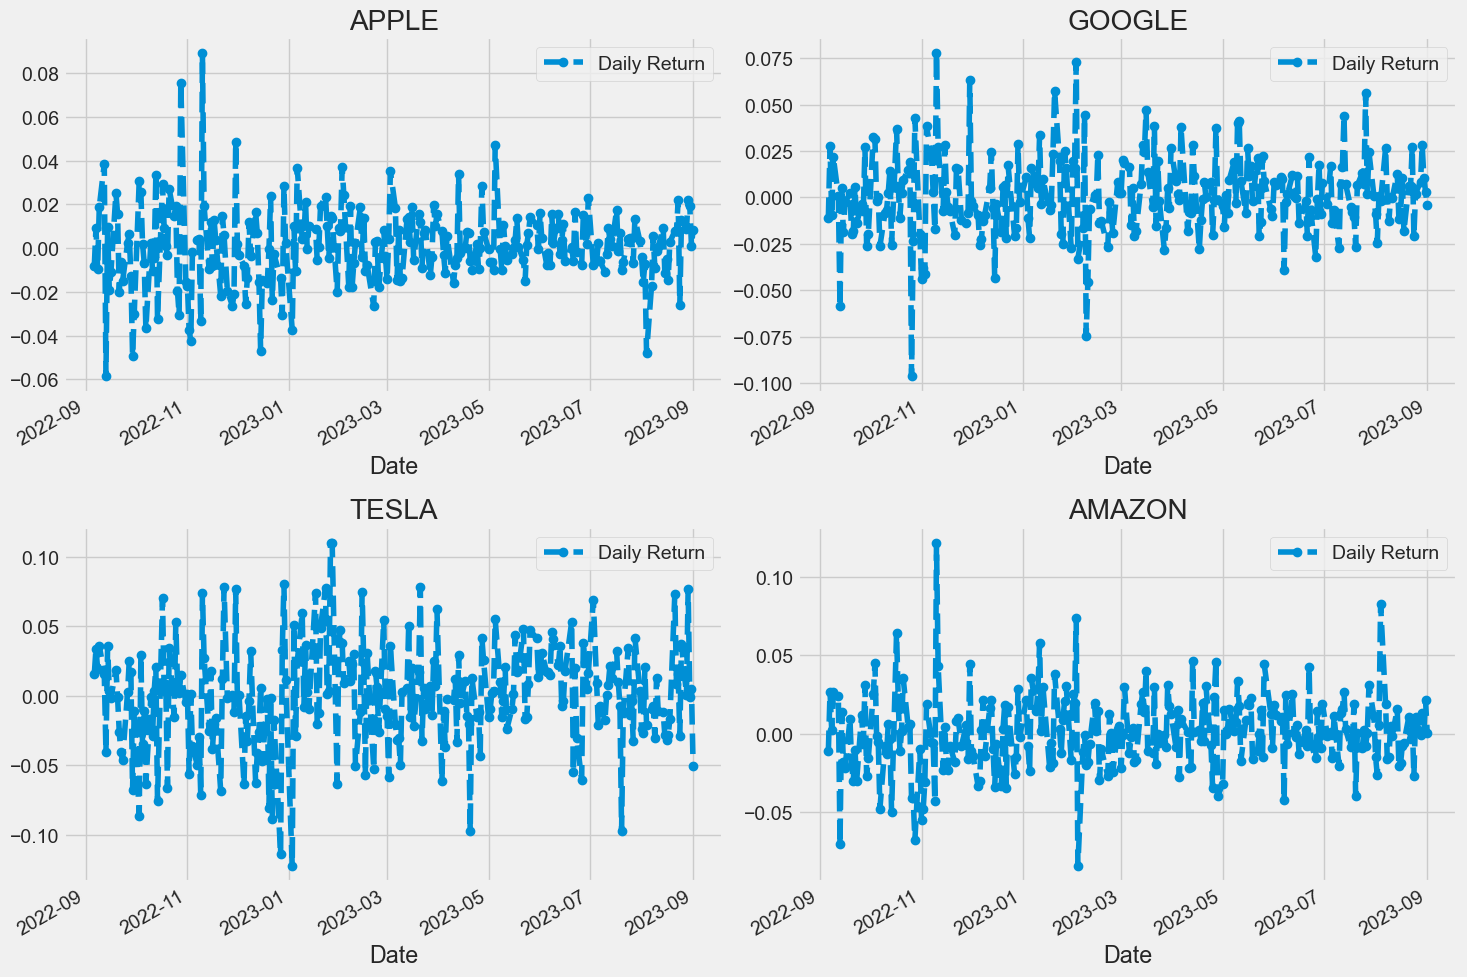

In [10]:
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)
AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')
GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')
TSLA['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('TESLA')
AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')
fig.tight_layout()

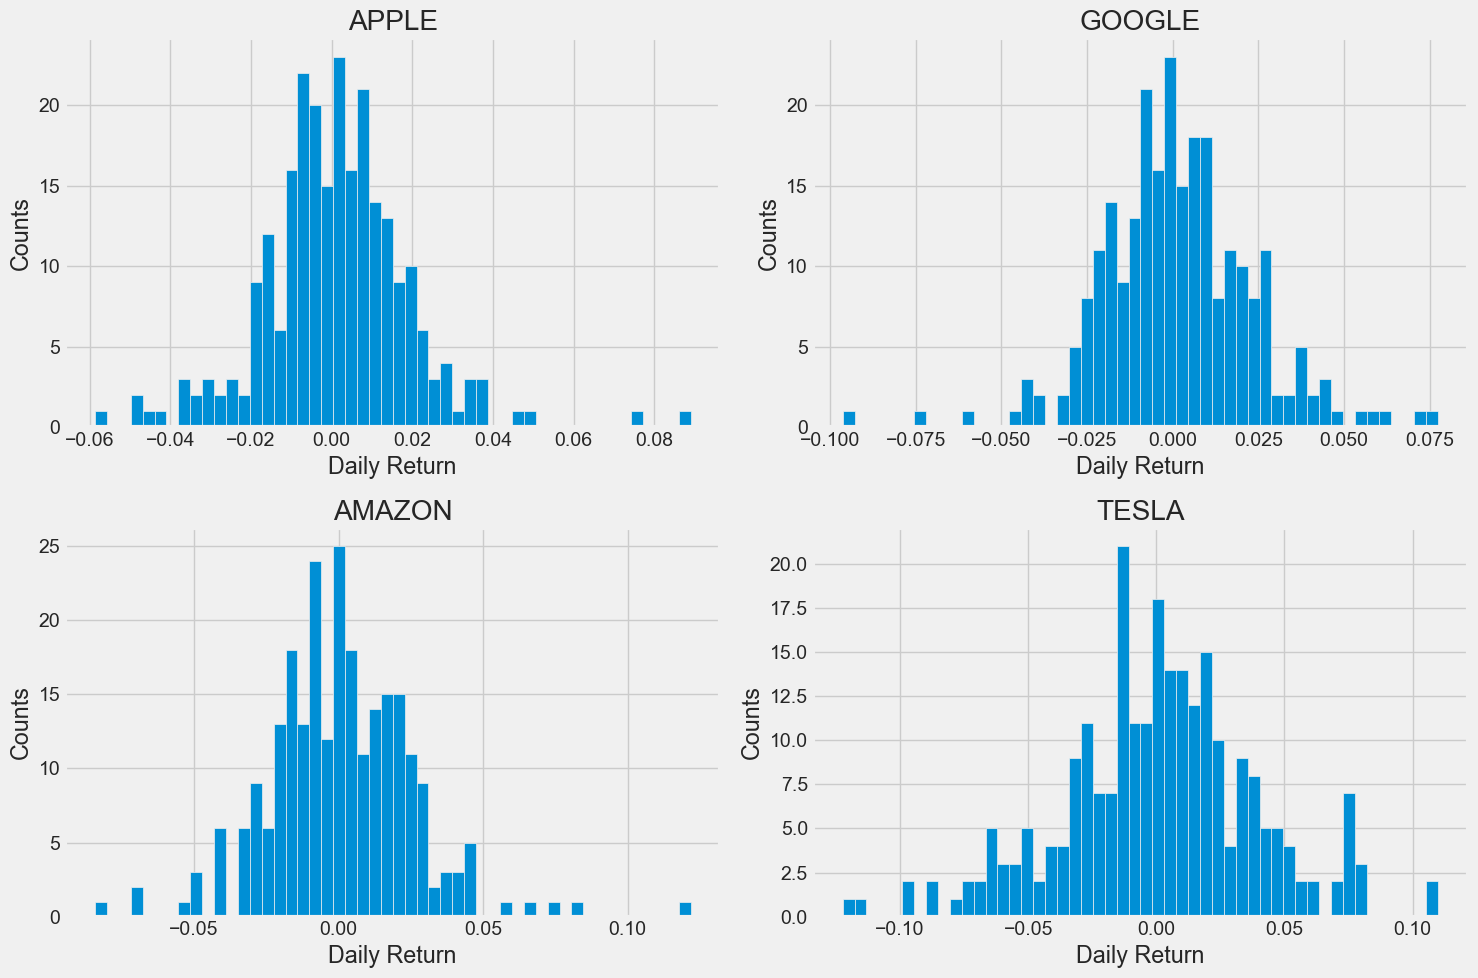

In [11]:
plt.figure(figsize=(15, 10))
for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')  
plt.tight_layout()

In [12]:
closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%%**********************]  4 of 4 completed


,AAPL,AMZN,GOOG,TSLA
Date,,,,
2022-09-02,NaN,NaN,NaN,NaN
2022-09-06,-0.008215,-0.010980,-0.011042,0.015581
2022-09-07,0.009254,0.026723,0.027912,0.033817
2022-09-08,-0.009618,0.002626,-0.009595,0.019598
2022-09-09,0.018840,0.026575,0.021568,0.036023


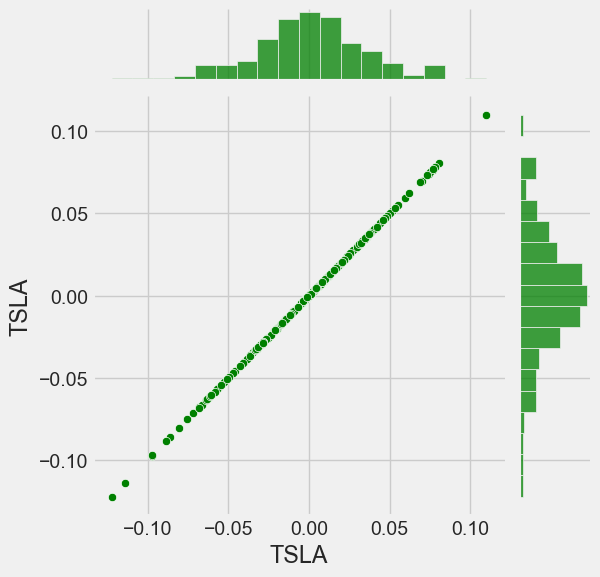

In [13]:
sns.jointplot(x='TSLA', y='TSLA', data=tech_rets, kind='scatter', color='green')

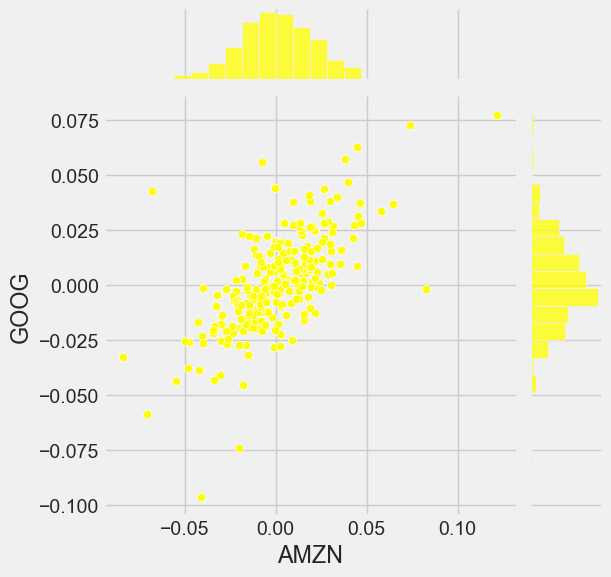

In [14]:
sns.jointplot(x='AMZN', y='GOOG', data=tech_rets, kind='scatter', color='yellow')

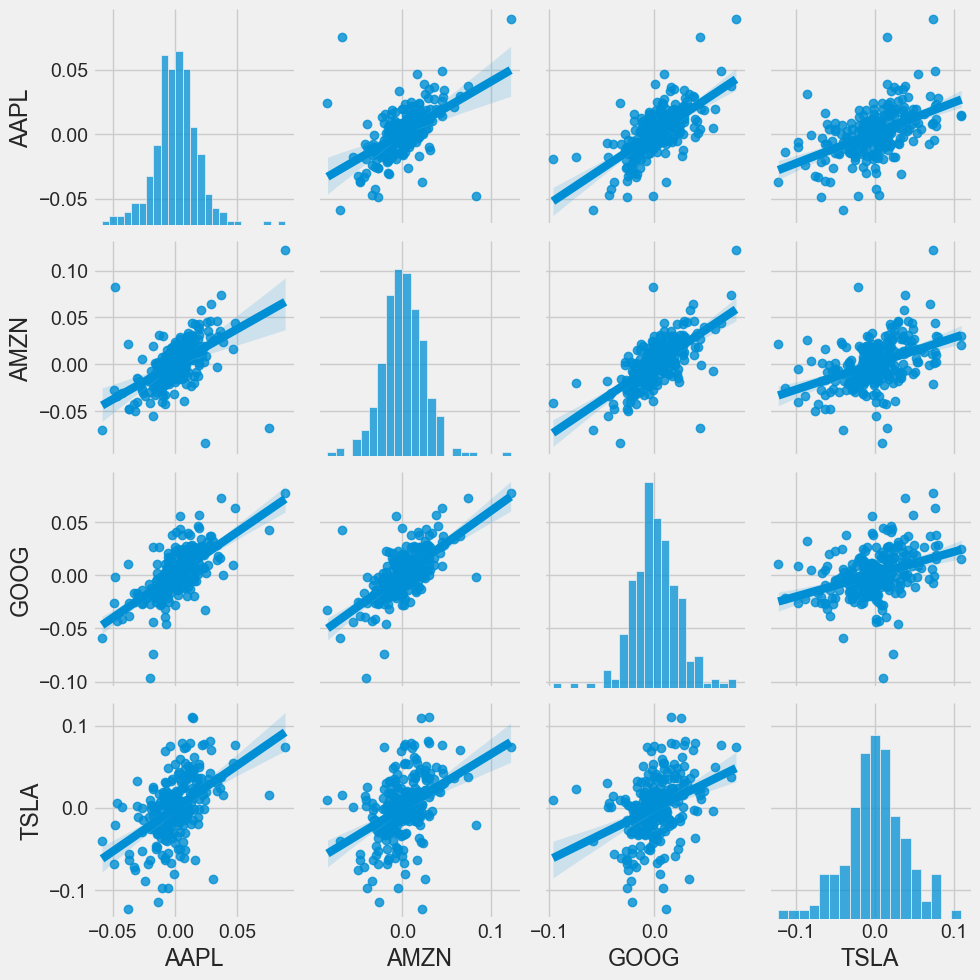

In [15]:
sns.pairplot(tech_rets, kind='reg')

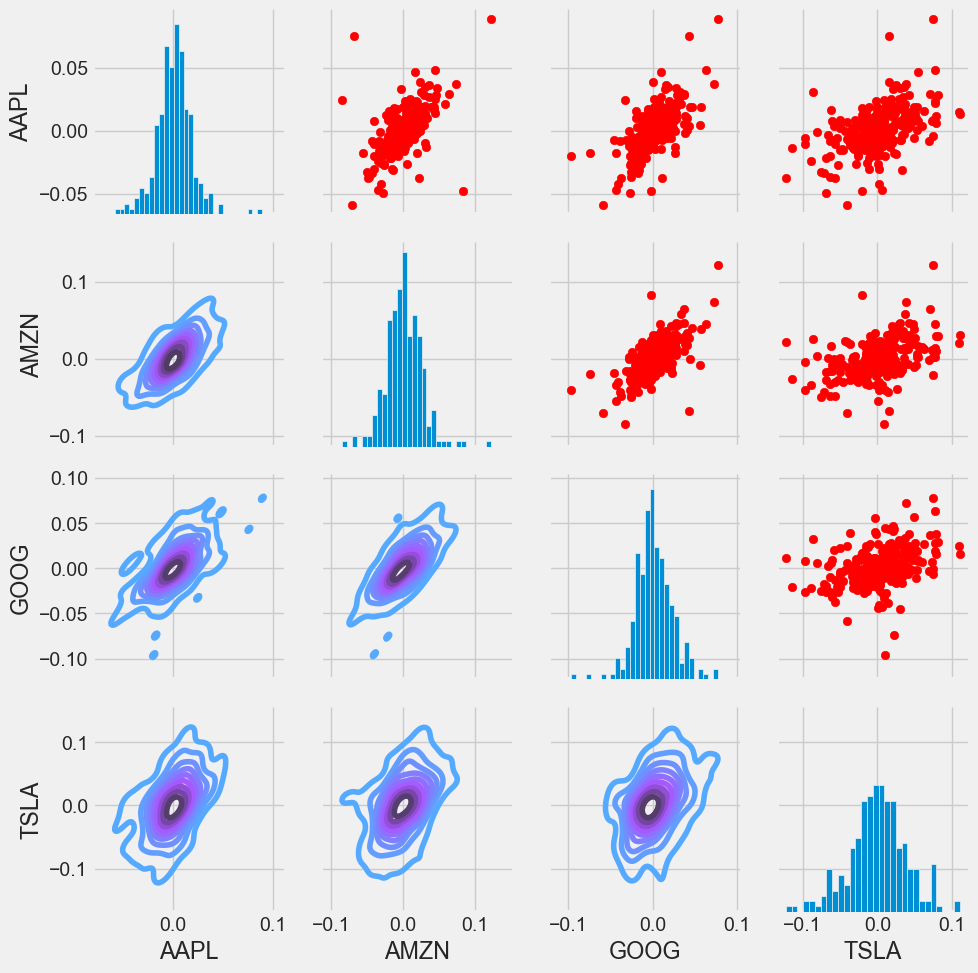

In [16]:
return_fig = sns.PairGrid(tech_rets.dropna())
return_fig.map_upper(plt.scatter, color='red')
return_fig.map_lower(sns.kdeplot, cmap='cool_d')
return_fig.map_diag(plt.hist, bins=30)

Text(0.5, 1.0, 'Correlation of Stock Closing Price')

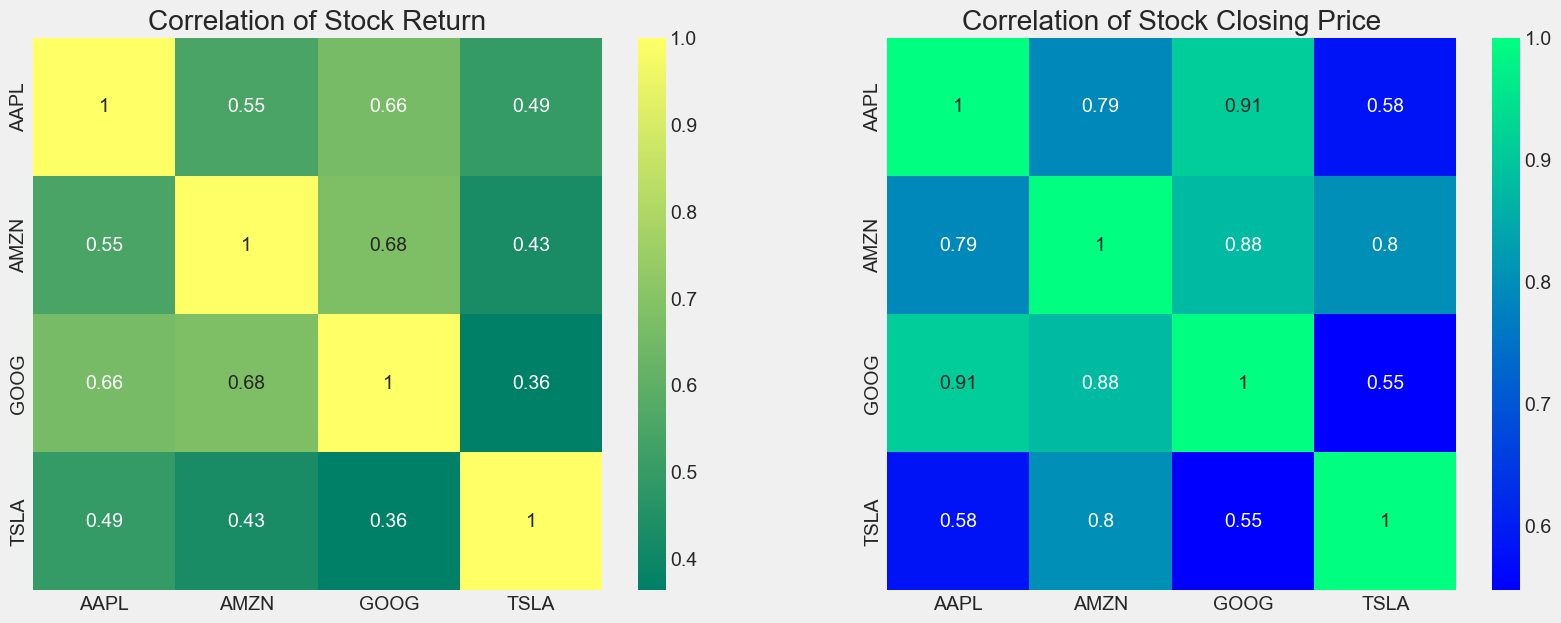

In [17]:
plt.figure(figsize=(18, 15))
plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of Stock Return')
plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='winter')
plt.title('Correlation of Stock Closing Price')

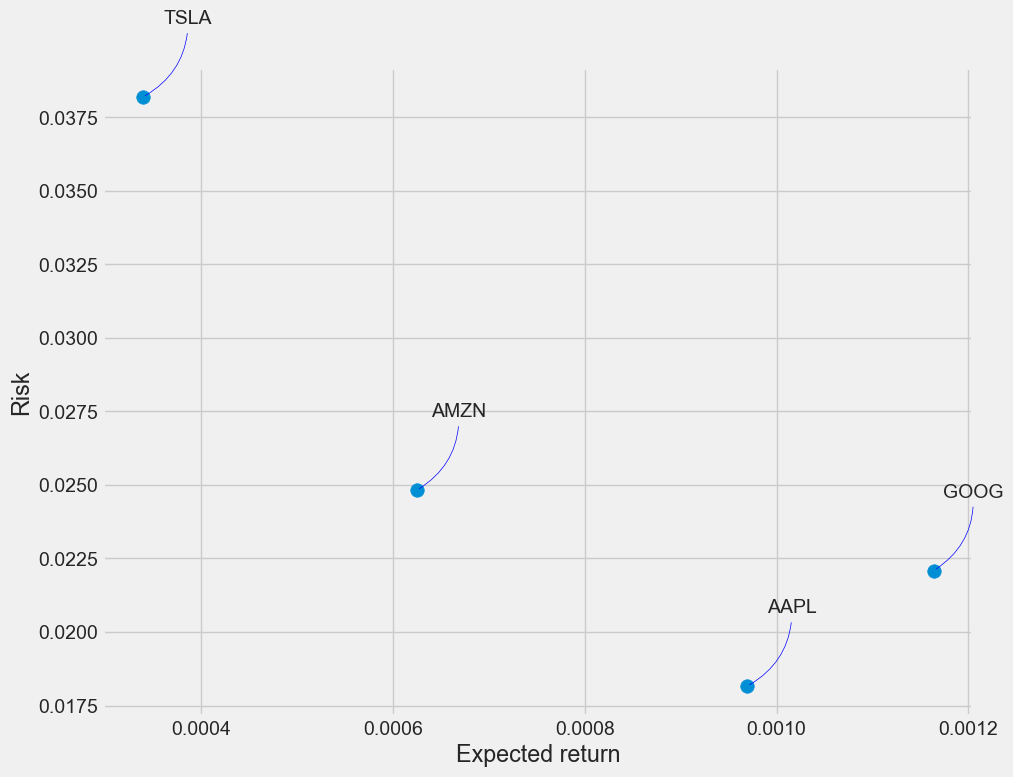

In [18]:
rets = tech_rets.dropna()
area = np.pi * 30
plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [19]:
df = pdr.get_data_yahoo('TSLA', start='2012-01-01', end=datetime.now())
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,1.929333,1.966667,1.843333,1.872000,1.872000,13921500
2012-01-04,1.880667,1.911333,1.833333,1.847333,1.847333,9451500
2012-01-05,1.850667,1.862000,1.790000,1.808000,1.808000,15082500
2012-01-06,1.813333,1.852667,1.760667,1.794000,1.794000,14794500
2012-01-09,1.800000,1.832667,1.741333,1.816667,1.816667,13455000
...,...,...,...,...,...,...
2023-08-28,242.580002,244.380005,235.350006,238.820007,238.820007,107673700
2023-08-29,238.580002,257.480011,237.770004,257.179993,257.179993,134047600
2023-08-30,254.199997,260.510010,250.589996,256.899994,256.899994,121988400


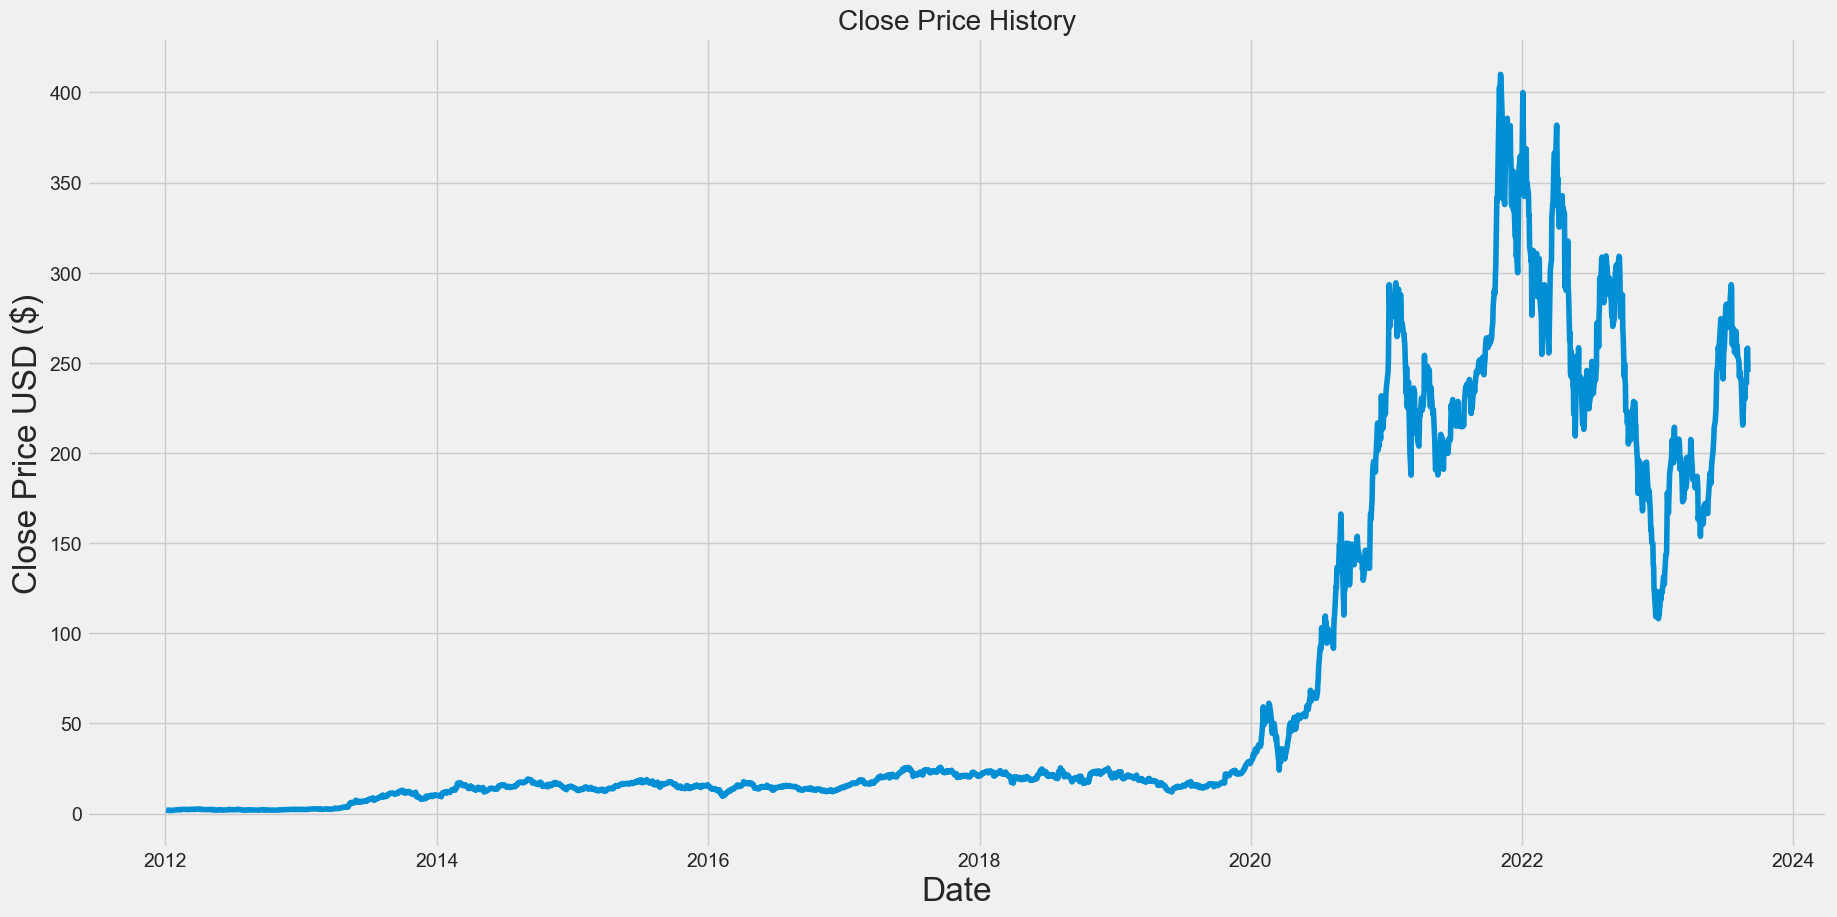

In [20]:
plt.figure(figsize=(20,10))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=24)
plt.ylabel('Close Price USD ($)', fontsize=24)
plt.show()

In [21]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = int(np.ceil( len(dataset) * .95 ))
training_data_len

2790

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00086343],
       [0.00080303],
       [0.00070674],
       ...,
       [0.62524236],
       [0.62813131],
       [0.59613236]])

In [23]:
train_data = scaled_data[0:int(training_data_len), :]
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.00086343, 0.00080303, 0.00070674, 0.00067246, 0.00072796,
       0.00078834, 0.00088791, 0.00089117, 0.        , 0.00062186,
       0.00065614, 0.00064798, 0.00062186, 0.00064961, 0.0007557 ,
       0.00084547, 0.00100379, 0.00106745, 0.00110662, 0.00102501,
       0.00110825, 0.00121761, 0.00136451, 0.0014706 , 0.00143796,
       0.00149182, 0.00159791, 0.00135634, 0.00142   , 0.00169421,
       0.00176439, 0.00185906, 0.001988  , 0.00191129, 0.00186559,
       0.00191618, 0.00178887, 0.00176766, 0.00179867, 0.00173338,
       0.0018966 , 0.00183621, 0.00179214, 0.00168441, 0.00168605,
       0.00167789, 0.00195046, 0.00215775, 0.00217081, 0.00204023,
       0.0019929 , 0.00204513, 0.00198963, 0.00198637, 0.00201738,
       0.00189497, 0.00184274, 0.00238462, 0.00247276, 0.00245807])]
[0.0023731972591546557]

[array([0.00086343, 0.00080303, 0.00070674, 0.00067246, 0.00072796,
       0.00078834, 0.00088791, 0.00089117, 0.        , 0.00062186,
       0.00065614, 0.00064798, 0.

In [27]:
pip install tensorflow-datasets

Defaulting to user installation because normal site-packages is not writeable
                                              0.0/5.4 MB ? eta -:--:--
     ----                                     0.6/5.4 MB 12.6 MB/s eta 0:00:01
     -----                                    0.8/5.4 MB 8.5 MB/s eta 0:00:01
     ------                                   0.9/5.4 MB 6.8 MB/s eta 0:00:01
     ------                                   0.9/5.4 MB 6.8 MB/s eta 0:00:01
     -------                                  1.0/5.4 MB 4.4 MB/s eta 0:00:01
     ---------                                1.3/5.4 MB 4.9 MB/s eta 0:00:01
     ----------                               1.5/5.4 MB 4.7 MB/s eta 0:00:01
     ------------                             1.6/5.4 MB 4.7 MB/s eta 0:00:01
     -------------                            1.8/5.4 MB 4.5 MB/s eta 0:00:01
     --------------                           1.9/5.4 MB 4.4 MB/s eta 0:00:01
     --------------                           1.9/5.4 MB 4.4 MB/s eta 

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\anupa\\AppData\\Roaming\\Python\\Python311\\site-packages\\google\\~upb\\_message.pyd'
Check the permissions.



In [29]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=1, epochs=1)

2730/2730 [==============================] - 40s 13ms/step - loss: 0.0019


In [30]:
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 [==============================] - 1s 12ms/step


14.815296354678418

C:\Users\anupa\AppData\Local\Temp\ipykernel_14552\2882300990.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


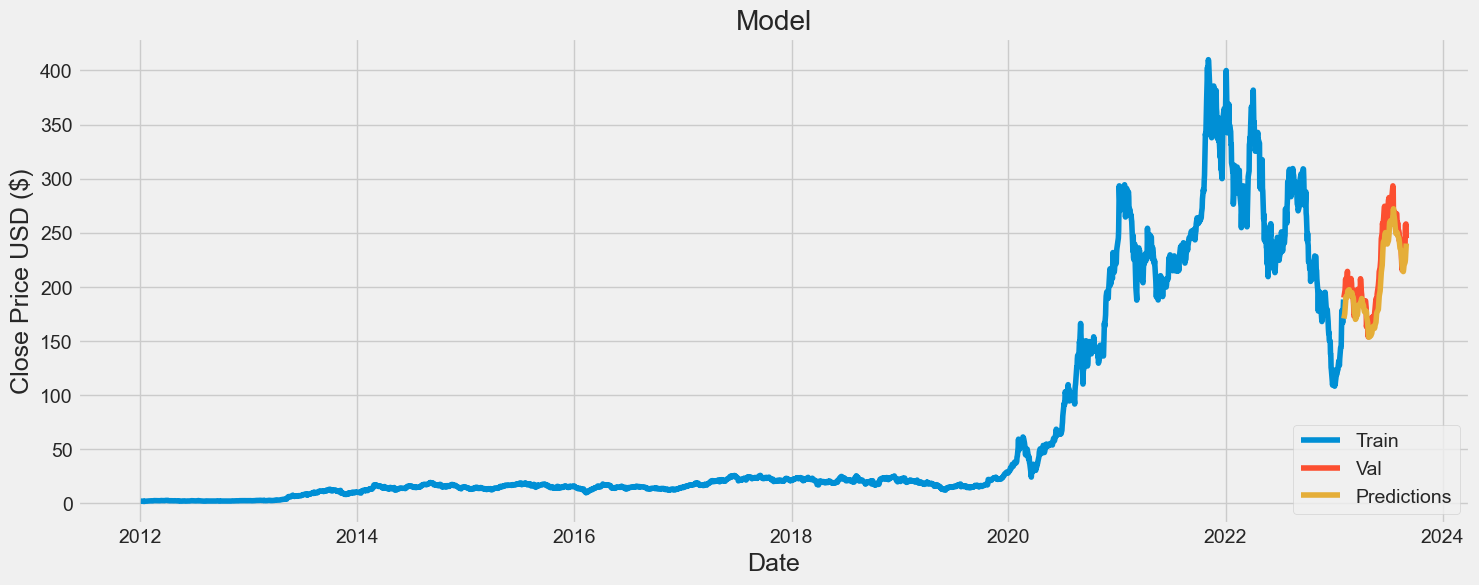

In [31]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()